In [1]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

(266, 474, 3)


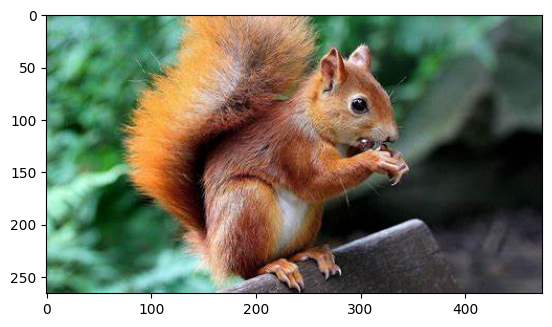

In [19]:
image = cv2.imread("../images/squirrel.jpg")
print(image.shape)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

(104, 106, 3)


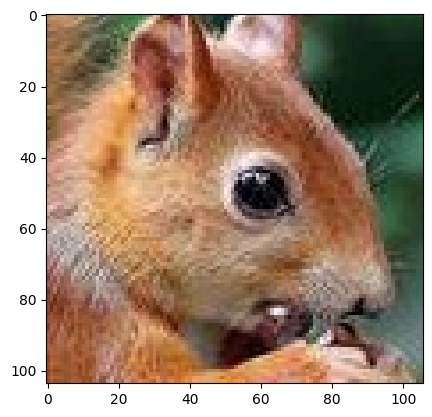

In [20]:
template = cv2.imread("../images/squirrel_template.jpg")
print(template.shape)
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))

# matchTemplate 模板匹配

In [21]:
match_method = cv2.TM_SQDIFF # TM_SQDIFF TM_SQDIFF_NORMED TM_CCORR TM_CCORR_NORMED TM_CCOEFF TM_CCOEFF_NORMED
m = cv2.matchTemplate(
    image=image,        # 图片
    templ=template,     # 模板
    method=match_method,# 匹配方法
)
m.shape

(163, 369)

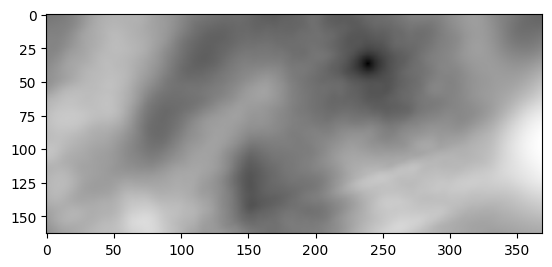

In [22]:
# 归一化模型
n = cv2.normalize(
    src=m,
    dst=None,
    alpha=0,
    beta=1,
    norm_type=cv2.NORM_MINMAX,
    dtype=-1,
    )
plt.imshow(cv2.cvtColor(n, cv2.COLOR_BGR2RGB))

In [23]:
min_value, max_value, min_loc, max_loc = cv2.minMaxLoc(src=n)
print(min_value, max_value)
print(min_loc, max_loc)

1.5360157590293966e-11 1.0
(239, 37) (368, 96)


In [24]:
if match_method == cv2.TM_SQDIFF or match_method == cv2.TM_SQDIFF_NORMED:
    temp_loc = min_loc
else:
    temp_loc = max_loc

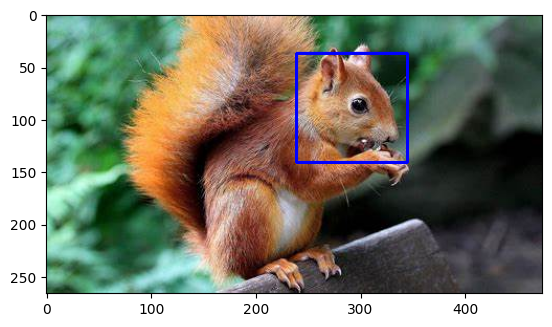

In [25]:
res = cv2.rectangle(
    img=image.copy(),
    pt1=(temp_loc[0], temp_loc[1]),
    pt2=(temp_loc[0] + template.shape[1], temp_loc[1] + template.shape[0]),
    color=(255, 0, 0),
    thickness=2
)

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))